# 聚类算法

## K-means 算法

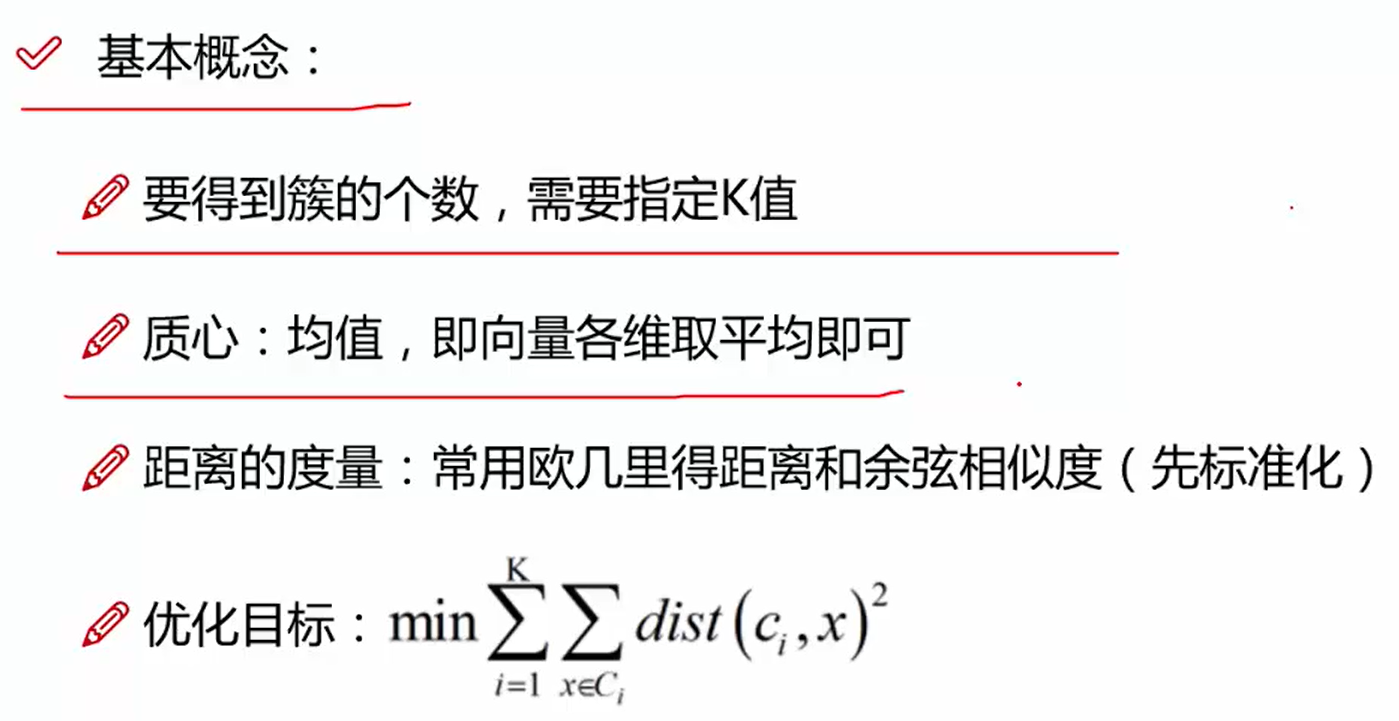

可视化网址 https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

K-means: 对于任意边界的簇，聚类效果并不好；
         聚类效果可能与初始值有关；
         簇的数量不容易确定；            

# DBSCAN算法（）

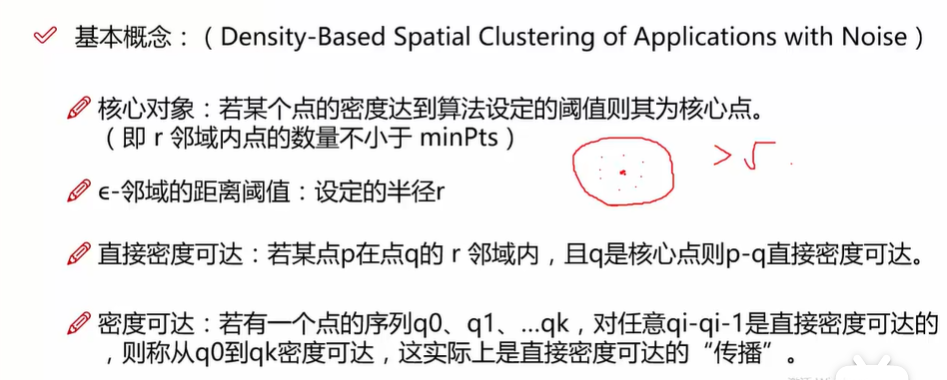

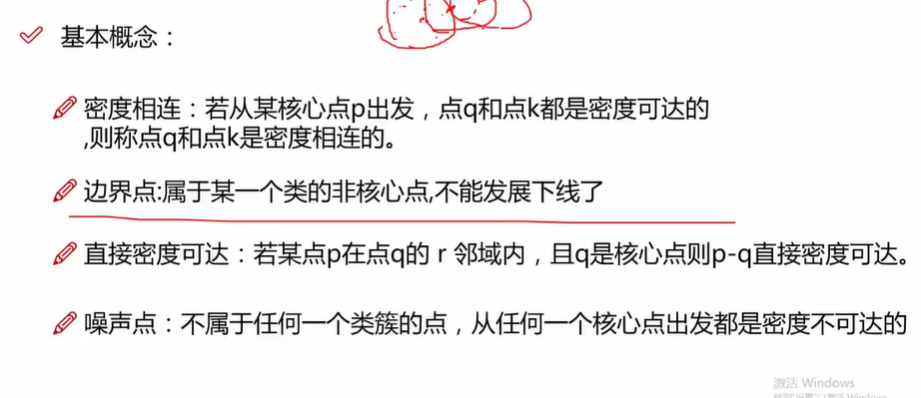

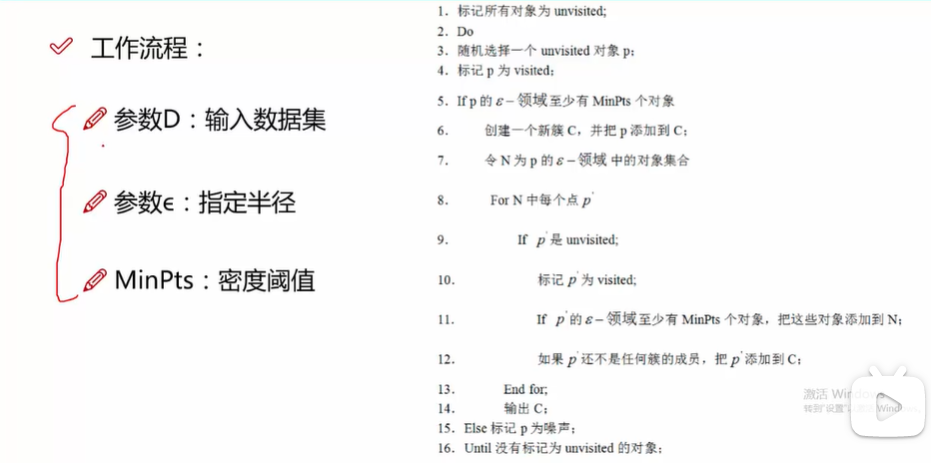

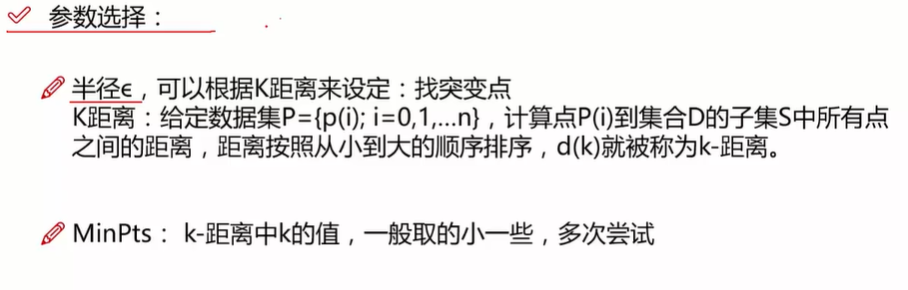

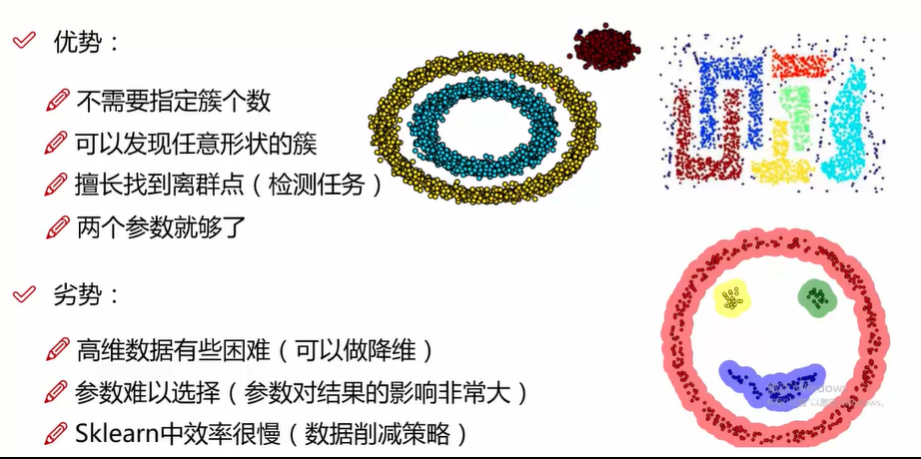

可视化网址 https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

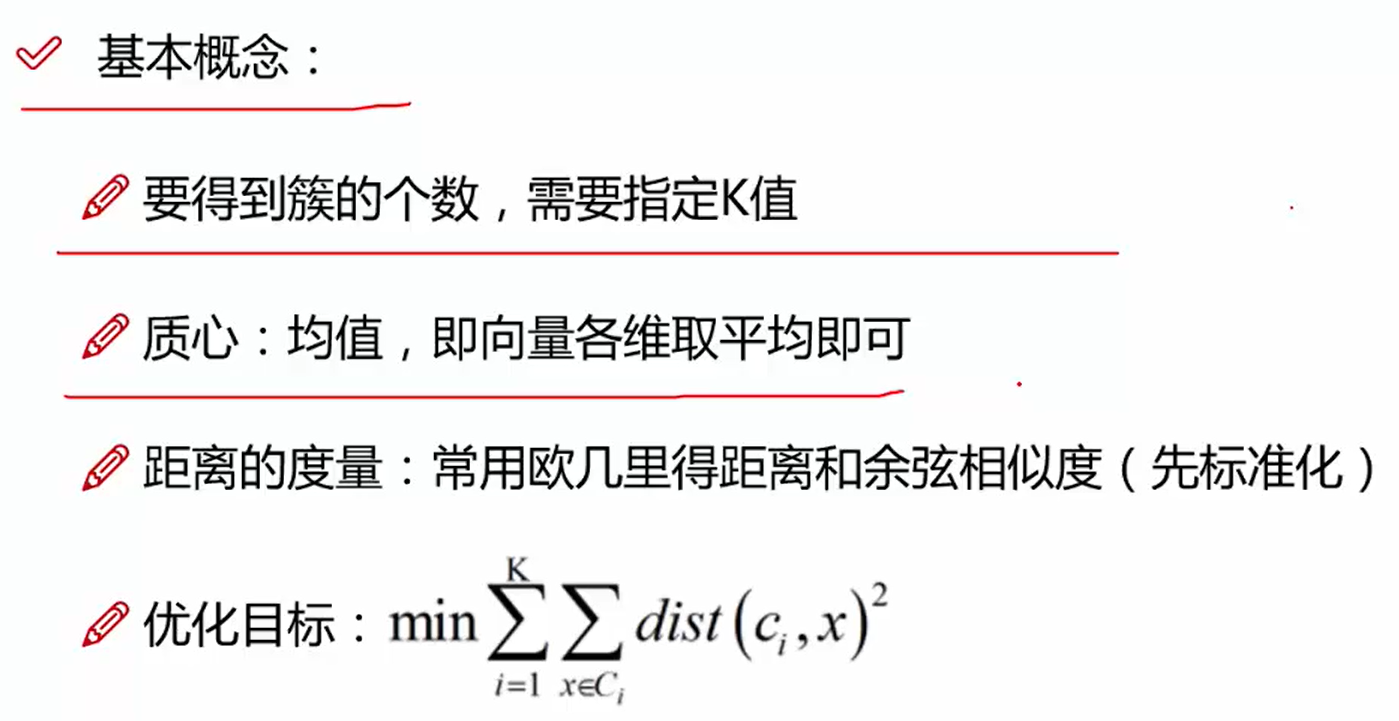

## Kmeans

In [1]:
import numpy as np
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)


In [2]:
from sklearn.datasets import make_blobs
blobs_centers = np.array(
    [[0.2,2.3],
    [-1.5,2.3],
    [-2.8,1.8],
    [-2.8,2.8],
    [-2.0,1.3]])
blob_std = np.array([0.4,0.3,0.1,0.1,0.1])

In [3]:
X,y = make_blobs(n_samples = 2000,centers =blobs_centers,cluster_std =blob_std,
                    random_state =7)

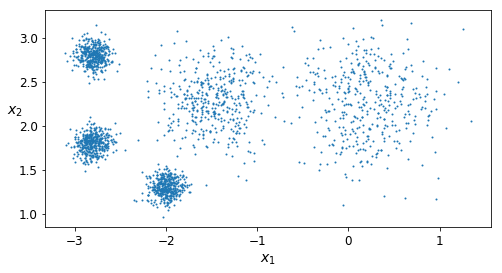

In [4]:
def plot_clusters(X,y=None):
    plt.scatter(X[:,0],X[:,1],c=y,s=1)
    plt.xlabel("$x_1$",fontsize =14)
    plt.ylabel("$x_2$",fontsize =14,rotation =0)
plt.figure(figsize=(8,4))
plot_clusters(X)
plt.show()


## 决策边界

In [5]:
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters =k,random_state =42)
y_pre = kmeans.fit_predict(X)

In [6]:
y_pre

array([4, 1, 0, ..., 3, 0, 1])

In [7]:
kmeans.labels_

array([4, 1, 0, ..., 3, 0, 1])

In [8]:
kmeans.cluster_centers_

array([[ 0.20876306,  2.25551336],
       [-2.80580621,  1.80056812],
       [-1.46046922,  2.30278886],
       [-2.79290307,  2.79641063],
       [-1.99213367,  1.3131094 ]])

In [9]:
X_new =np.array([[0,2],[3,2],[-3,3],[-3,3.5],[1.5,3.5]])
kmeans.predict(X_new)

array([0, 0, 3, 3, 0])

In [10]:
def plot_data(X):
    plt.plot(X[:,0],X[:,1],'k.',markersize =2)
    
def plot_centroids(centroids,weights =None,circle_color ='w',cross_color ='k'):
    if weights is not None:
        centroids =centroids[weights>weights.max()/10]
    plt.scatter(centroids[:,0],centroids[:,1],
               marker = 'o',s = 35, linewidths = 8,
               color = circle_color, zorder = 10,alpha = 0.9)
    plt.scatter(centroids[:,0],centroids[:,1],
               marker ='x',s = 16, linewidths = 12,
               color = 'k', zorder = 11,alpha = 1)    

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)

    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)
        
    if show_xlabels:
        plt.xlabel("$x_1$",fontsize =14)
    else:
        plt.tick_params(labelbottom = False)
    if show_ylabels:
        plt.ylabel("$x_2$",fontsize = 14)
    else:
        plt.tick_params(labelleft = False) 
        

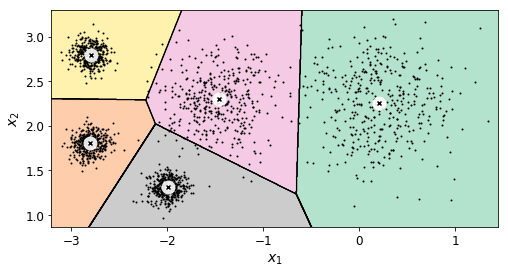

In [11]:
plt.figure(figsize=(8,4))
plot_decision_boundaries(kmeans,X)
plt.show()

### 算法流程

In [12]:
kmeans_iter1 = KMeans(n_clusters =5,init='random', n_init = 1,max_iter =1,random_state=1)
kmeans_iter2 = KMeans(n_clusters =5,init='random', n_init = 1,max_iter =2,random_state=1)
kmeans_iter3 = KMeans(n_clusters =5,init='random', n_init = 1,max_iter =3,random_state=1)

kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)



KMeans(algorithm='auto', copy_x=True, init='random', max_iter=3, n_clusters=5,
    n_init=1, n_jobs=1, precompute_distances='auto', random_state=1,
    tol=0.0001, verbose=0)

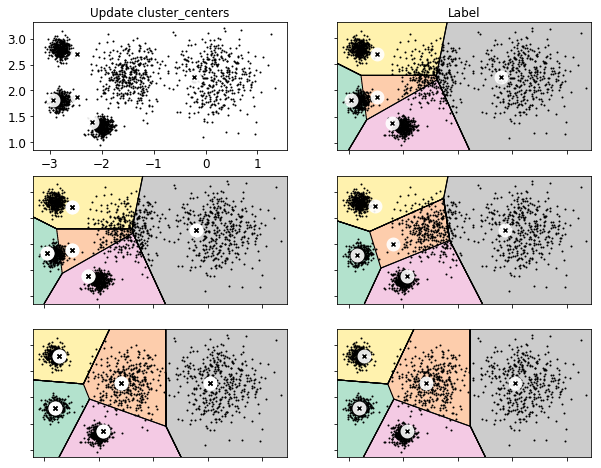

In [13]:
plt.figure(figsize =(10,8))
plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_,circle_color ='w',cross_color ='k')
plt.title('Update cluster_centers')

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title('Label')

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plot_centroids(kmeans_iter1.cluster_centers_,)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter3, X, show_xlabels=False, show_ylabels=False)
plot_centroids(kmeans_iter3.cluster_centers_,)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_xlabels=False, show_ylabels=False)


## 不稳定结果

In [14]:
def plot_clusterer_comparison(c1,c2,X):
    c1.fit(X)
    c2.fit(X)
    plt.figure(figsize=(12,4))
    plt.subplot(121)
    plot_decision_boundaries(c1,X)
    plt.subplot(122)
    plot_decision_boundaries(c2,X)

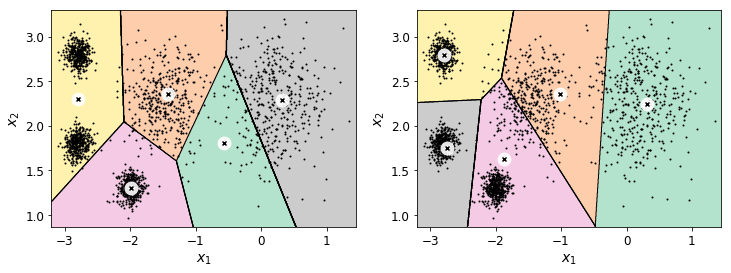

In [15]:
c1 = KMeans(n_clusters =5,init='random', n_init = 1,max_iter =1,random_state=11)
c2= KMeans(n_clusters =5,init='random', n_init = 1,max_iter =1,random_state=19)
plot_clusterer_comparison(c1,c2,X)

## 评估标准

In [16]:
kmeans.inertia_

209.75085195935378

In [17]:
X_dist = kmeans.transform(X)
kmeans.transform(X)

array([[2.29513354, 1.01527908, 1.05266413, 1.70459707, 0.09931441],
       [3.11541584, 0.06940319, 1.4976118 , 0.99002955, 1.01262197],
       [1.32016676, 3.81891769, 2.67293032, 4.09069201, 2.95634811],
       ...,
       [3.04886464, 0.92891717, 1.40874069, 0.06769209, 1.63207556],
       [0.14895409, 3.10499367, 1.7038774 , 3.05913478, 2.48365765],
       [2.8625311 , 0.22881753, 1.22754965, 0.85434589, 0.91149486]])

In [18]:
kmeans.labels_

array([4, 1, 0, ..., 3, 0, 1])

In [19]:
X_dist[np.arange(len(X_dist)),kmeans.labels_]

array([0.09931441, 0.06940319, 1.32016676, ..., 0.06769209, 0.14895409,
       0.22881753])

In [20]:
np.sum(X_dist[np.arange(len(X_dist)),kmeans.labels_]**2)

209.75085195935446

In [21]:
kmeans.score(X)

-209.75085195935446

## 找到最佳簇数
### 如果k值越大，得到的结果肯定越来越小

In [22]:
kmeans_per_k = [KMeans(n_clusters = k).fit(X) for k in range(1,10)]
interias = [model.inertia_ for model in kmeans_per_k]

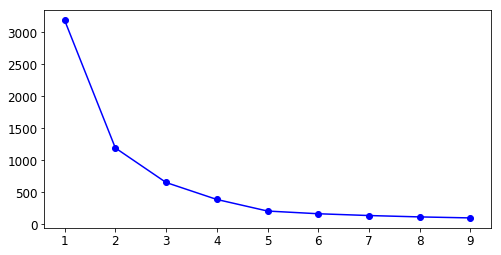

In [23]:
plt.figure(figsize =(8,4))
plt.plot(range(1,10),interias,'bo-')
plt.show()

## 轮廓系数

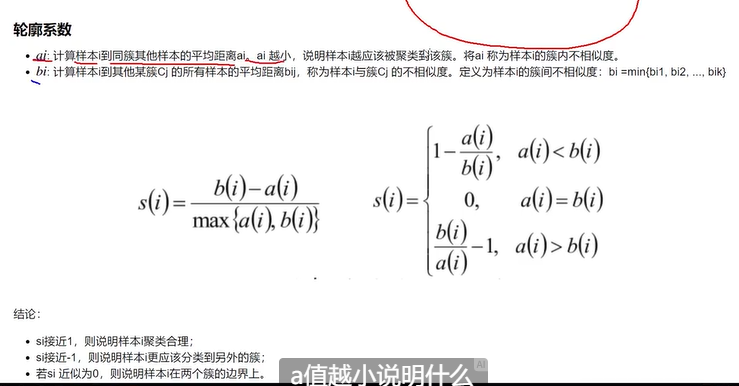

In [24]:
from sklearn.metrics import silhouette_score
silhouette_scores = [silhouette_score(X,model.labels_) for model in kmeans_per_k[1:]]
silhouette_scores

[0.5884821750474124,
 0.5317502110231115,
 0.5872264377911642,
 0.7022204883979954,
 0.6505797593624666,
 0.6570376466649073,
 0.6220863630680308,
 0.6289202011215107]

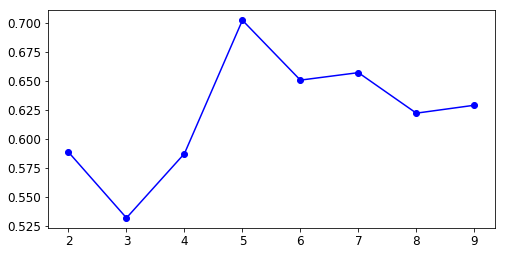

In [25]:
plt.figure(figsize =(8,4))
plt.plot(range(2,10),silhouette_scores,'bo-')
plt.show()

# Kmeans 存在的问题

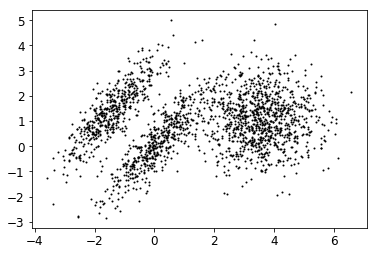

In [26]:
X1,y1 = make_blobs(n_samples =1000, centers =((4,-4),(0,0)),random_state =42)
X1 = X1.dot(np.array([[0.374,0.95],[0.732,0.598]]))
X2,y2 = make_blobs(n_samples =1000, centers =1,random_state =42)
X2 = X2+[6,-8]
X = np.r_[X1,X2]
y = np.r_[y1,y2]
plot_data(X)

In [27]:
kmeans_good = KMeans(n_clusters =3,init = np.array([[-1.5,2.5],[0.5,0],[4,0]]),n_init = 1,random_state =42)
kmeans_bad = KMeans(n_clusters =3,random_state =42)
kmeans_good.fit(X)
kmeans_bad.fit(X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

Text(0.5,1,'Bad-inertial = 3571.3921455096233')

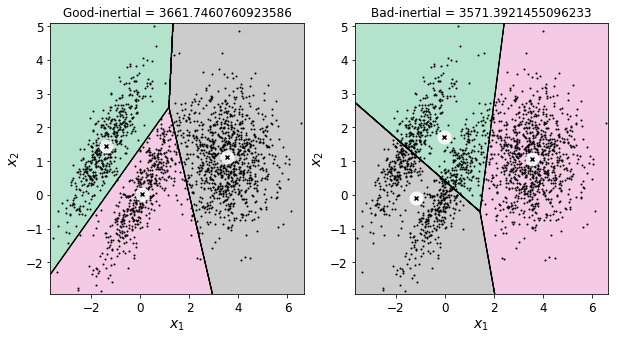

In [28]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plot_decision_boundaries(kmeans_good,X)
plt.title('Good-inertial = {}'.format(kmeans_good.inertia_))
plt.subplot(122)
plot_decision_boundaries(kmeans_bad,X)
plt.title('Bad-inertial = {}'.format(kmeans_bad.inertia_))

# 图像分割

In [55]:
# 9.1.2 Clustering:K-means (Image Segmentation)
## Package
import urllib.request
from matplotlib.image import imread


image = imread('D:\software1\VS2010\VC\input.png')
image.shape

(505, 675, 3)

In [56]:
X = image.reshape(-1,3)
X.shape

(340875, 3)

In [57]:
kmeans = KMeans(n_clusters =8,random_state=42).fit(X)

In [58]:
kmeans.cluster_centers_

array([[0.9952189 , 0.99635744, 0.99382246],
       [0.30064875, 0.38472694, 0.22392255],
       [0.55495316, 0.57599056, 0.5503882 ],
       [0.07533213, 0.12037989, 0.08463493],
       [0.4763388 , 0.5300034 , 0.30222362],
       [0.9582341 , 0.7659023 , 0.4105683 ],
       [0.15636933, 0.23359591, 0.1444572 ],
       [0.6245655 , 0.64845806, 0.6335058 ]], dtype=float32)

In [59]:
segmented_img =  kmeans.cluster_centers_[kmeans.labels_].reshape(image.shape)

In [60]:
segmented_imgs =[]
n_colors = (10,8,6,4,2)
for n_cluster in n_colors:
    kmeans = KMeans(n_clusters = n_cluster,random_state=42).fit(X)
    segmented_img =  kmeans.cluster_centers_[kmeans.labels_].reshape(image.shape)
    segmented_imgs.append(segmented_img)


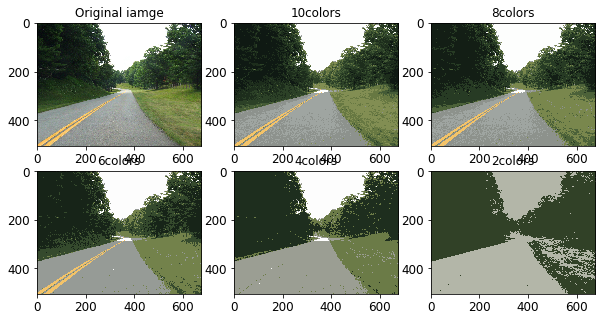

In [62]:
plt.figure(figsize =(10,5))
plt.subplot(231)
plt.imshow(image)
plt.title('Original iamge')

for idx,n_clusters in enumerate(n_colors):
    plt.subplot(232+idx)
    plt.imshow(segmented_imgs[idx])
    plt.title('{}colors'.format(n_clusters))

## 半监督学习
首先，将训练集聚类为50个集群，对于每个聚类，找到最靠近质心的图像，将这些图像称为代表性图像：

In [68]:
from sklearn.datasets import load_digits
X_digits,y_digits = load_digits(return_X_y =True)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X_digits,y_digits,random_state =42)
X_train.shape

In [70]:
X_digits.shape

(1797, 64)

In [73]:
from sklearn.linear_model import LogisticRegression
n_labeled =50

log_reg = LogisticRegression(random_state =42)
log_reg.fit(X_train[:n_labeled],y_train[:n_labeled])
log_reg.score(X_test,y_test)

0.8266666666666667

In [78]:
k = 50
kmeans = KMeans(n_clusters = k,random_state =42)
X_digits_dist = kmeans.fit_transform(X_train)
X_digits_dist.shape

(1347, 50)

In [79]:
representative_digits_idx = np.argmin(X_digits_dist,axis =0)
X_representative_digits= X_train[representative_digits_idx]

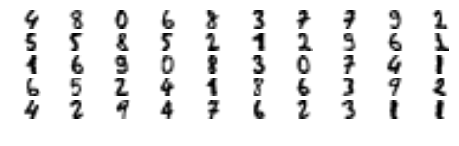

In [82]:
plt.figure(figsize =(8,2))
for index,X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k//10,10,index+1)
    plt.imshow(X_representative_digit.reshape(8,8),cmap ='binary',interpolation ='bilinear')
    plt.axis('off')
plt.show()

### 对50个代表性图像，进行人工标签，作为样本

In [98]:
y_representative_digits =np.array([
    4,8,0,6,8,3,7,7,9,2,
    5,5,8,5,2,1,2,9,6,1,
    1,6,9,0,8,3,0,7,4,1,
    6,5,2,4,1,8,6,3,9,2,
    4,2,9,4,7,6,2,3,1,1])

In [99]:
y_representative_digits.shape

(50,)

In [100]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_representative_digits,y_representative_digits)
log_reg.score(X_test,y_test)

0.9244444444444444

### 更进一步：将标签传播导同一集群的其他样本samples

In [101]:
y_train_propagated = np.empty(len(X_train),dtype =np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i]=y_representative_digits[i]
    
log_reg =LogisticRegression(random_state =42)
log_reg.fit(X_train,y_train_propagated)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [102]:
log_reg.score(X_test,y_test)

0.9288888888888889

### 取前20个

### DBSCAN

In [103]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples =1000,noise =0.05,random_state =42)


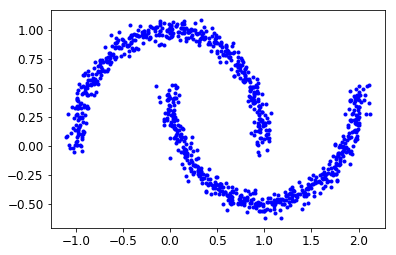

In [104]:
plt.plot(X[:,0],X[:,1],'b.')

In [107]:
from sklearn.cluster import DBSCAN
dbscan =DBSCAN(eps =0.5,min_samples =5)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

In [108]:
dbscan.labels_[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [109]:
dbscan.core_sample_indices_[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [111]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

NameError: name 'save_fig' is not defined

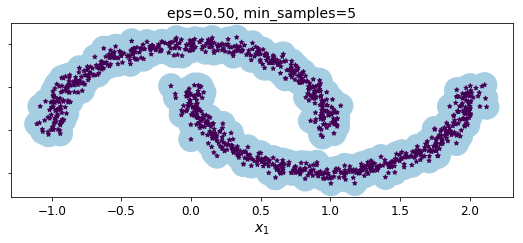

In [113]:
plt.figure(figsize=(9, 3.2))
plot_dbscan(dbscan, X, size=600, show_ylabels=False)

plt.show()